In [151]:
import numpy as np 
import pandas as pd 
import scipy 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings 
sns.set()
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima 
import datetime 

In [83]:
df_train=pd.read_csv("Train_data.csv")

In [84]:
df_test=pd.read_csv("Test_data.csv")

In [85]:
df_train1=df_train.copy()
df_train1.Datetime = pd.to_datetime(df_train1.Datetime, dayfirst = True)
df_train1.set_index("Datetime", inplace=True)

In [86]:
df_train1

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
...,...,...
2014-09-25 19:00:00,18283,868
2014-09-25 20:00:00,18284,732
2014-09-25 21:00:00,18285,702


In [87]:
df_test1=df_test.copy()
df_test1["Count"]=0
df_test1.Datetime = pd.to_datetime(df_test1.Datetime, dayfirst = True)
df_test1.set_index("Datetime", inplace=True)
df_test1

,ID,Count
Datetime,,
2014-09-26 00:00:00,18288,0
2014-09-26 01:00:00,18289,0
2014-09-26 02:00:00,18290,0
2014-09-26 03:00:00,18291,0
2014-09-26 04:00:00,18292,0
...,...,...
2015-04-26 19:00:00,23395,0
2015-04-26 20:00:00,23396,0
2015-04-26 21:00:00,23397,0


In [88]:
df=pd.concat([df_train1,df_test1])

In [89]:
df

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
...,...,...
2015-04-26 19:00:00,23395,0
2015-04-26 20:00:00,23396,0
2015-04-26 21:00:00,23397,0


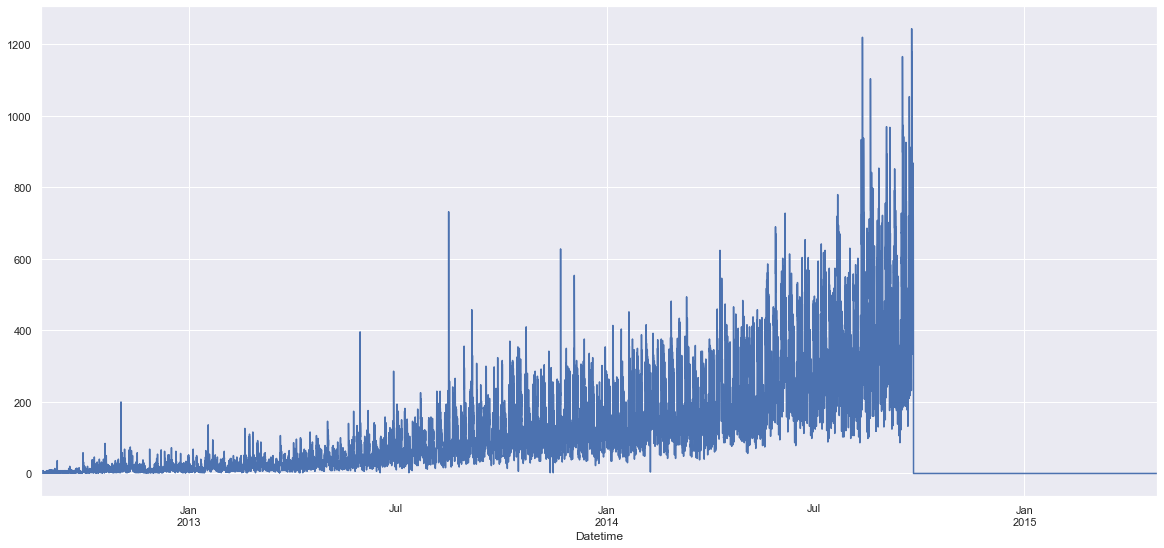

In [90]:
df.Count.plot(figsize=(20,9))
plt.show()

In [91]:
df.last_valid_index()

Timestamp('2015-04-26 23:00:00')

In [95]:
model2 = auto_arima(df.Count[1:len(df_train1)],maxiter = 50, alpha = 0.05, n_jobs = -1, information_criterion = 'aic',out_of_sample = int(len(df_train)*0.2))
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                18287
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -93063.131
Date:                Sun, 19 Apr 2020   AIC                         186142.261
Time:                        01:30:35   BIC                         186204.773
Sample:                             0   HQIC                        186162.802
                              - 18287                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0079      0.005      1.502      0.133      -0.002       0.018
ar.L1          0.7302      0.011     64.744      0.000       0.708       0.752
ar.L2          0.9162      0.013     73.261      0.000       0.892       0.941
ar.L3         -0.7580      0.010    -78.531      0.000      -0.777      -0.739
ma.L1         -0.7370      0.013    -58.934      0.000      -0.761      -0.712
ma.L2         -0.9581      0.014    -69.095      0.000      -0.985      -0.931
ma.L3          0.7099      0.012     59.332      0.000       0.686       0.733
sigma2      1578.0484      6.026    261.889      0.000    1566.238    1589.858
===================================================================================
Ljung-Box (Q):                     3376.65   Jarque-Bera (JB):            333589.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              33.87   Skew:                             2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
model3=auto_arima(df.Count[1:len(df_train1)],maxiter = 50,trend='ct', alpha = 0.05, n_jobs = -1, information_criterion = 'oob',out_of_sample = int(len(df_train)*0.2))
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                18287
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -93063.131
Date:                Sun, 19 Apr 2020   AIC                         186142.261
Time:                        01:37:54   BIC                         186204.773
Sample:                             0   HQIC                        186162.802
                              - 18287                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0079      0.005      1.502      0.133      -0.002       0.018
ar.L1          0.7302      0.011     64.744      0.000       0.708       0.752
ar.L2          0.9162      0.013     73.261      0.000       0.892       0.941
ar.L3         -0.7580      0.010    -78.531      0.000      -0.777      -0.739
ma.L1         -0.7370      0.013    -58.934      0.000      -0.761      -0.712
ma.L2         -0.9581      0.014    -69.095      0.000      -0.985      -0.931
ma.L3          0.7099      0.012     59.332      0.000       0.686       0.733
sigma2      1578.0484      6.026    261.889      0.000    1566.238    1589.858
===================================================================================
Ljung-Box (Q):                     3376.65   Jarque-Bera (JB):            333589.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              33.87   Skew:                             2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [253]:
model=SARIMAX(df.Count[1:len(df_train)],order=(3,1,3),maxiter = 50,trend='ct', alpha = 0.05, n_jobs = -1, information_criterion = 'aic',out_of_sample = int(len(df_train)*0.2))
result=model.fit()

In [254]:
startd=df_test1.first_valid_index()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Count   No. Observations:                18287
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 4)   Log Likelihood              -96079.639
Date:                             Sun, 19 Apr 2020   AIC                         192181.279
Time:                                     03:07:22   BIC                         192267.229
Sample:                                 08-25-2012   HQIC                        192209.522
                                      - 09-25-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0356      1.033      0.034      0.973      -1.989       2.060
drift       -5.91e-06   7.03e-05     -0.084      0.933      -0.000       0.000
ar.L1         -0.1142      0.759     -0.150      0.880      -1.602       1.374
ar.L2         -0.0785      0.206     -0.380      0.704      -0.483       0.326
ar.L3         -0.0431      0.222     -0.194      0.846      -0.478       0.392
ma.L1          0.1923      0.760      0.253      0.800      -1.296       1.681
ma.L2          0.2056      0.170      1.211      0.226      -0.127       0.538
ma.L3          0.1129      0.297      0.381      0.703      -0.469       0.694
ar.S.L4        0.0153      0.041      0.370      0.711      -0.066       0.096
ma.S.L4       -0.7038      0.011    -61.997      0.000      -0.726      -0.682
sigma2      3212.1979     22.818    140.777      0.000    3167.476    3256.920
===================================================================================
Ljung-Box (Q):                     5616.51   Jarque-Bera (JB):            176768.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              33.45   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [241]:
startd

Timestamp('2014-09-26 00:00:00')

In [242]:
predicted_data = pd.DataFrame(result.predict(start =startd, end =df_test1.last_valid_index(),dynamic=True))

In [243]:
predicted_data

,0
2014-09-26 00:00:00,490.875900
2014-09-26 01:00:00,466.935162
2014-09-26 02:00:00,445.629609
2014-09-26 03:00:00,466.723819
2014-09-26 04:00:00,450.368337
...,...
2015-04-26 19:00:00,-33696.496151
2015-04-26 20:00:00,-33702.173920
2015-04-26 21:00:00,-33717.076681
2015-04-26 22:00:00,-33747.378646


In [244]:
submission=predicted_data.copy()
submission=submission.round(0).astype(int)

In [245]:
submission.index=df_test["ID"]

In [246]:
submission

,0
ID,
18288,491
18289,467
18290,446
18291,467
18292,450
...,...
23395,-33696
23396,-33702
23397,-33717


In [216]:
submission.describe()

,0
count,5112.000000
mean,713.123044
std,108.934070
min,534.000000
25%,618.000000
50%,708.000000
75%,806.000000
max,911.000000


In [247]:
submission.rename(columns={0:"Count"},inplace=True)

In [249]:
submission["Count"]=submission["Count"].abs()

In [250]:
submission.to_csv("submissiondifferent.csv")